# Analysis: Popularity Dynamics

In [ ]:
### import packages
import numpy as np
import pandas as pd
import seaborn as sns
import os
import glob
import matplotlib.pyplot as  plt
import json
import yfinance as yf

## Ticker popularity by message count

In [13]:
df = pd.read_csv('E:\\analysis_data\\have_symbol_big.csv').drop(columns = ['Unnamed: 0','sentiment','symbol_list','sym_number'])
df.head()

,message_id,user_id,created_at,symbol
0,4,593,2008-05-27,V
1,5,8687,2008-05-27,NES
2,6,549,2008-05-27,AAPL
3,7,170,2008-05-27,XLE
4,9,126,2008-05-27,AAPL


In [14]:
df.shape

(241198362, 4)

In [15]:
df = df.loc[df['created_at']<='2022-12-31'].dropna()

In [4]:
len(df.symbol.unique())

25700

#### make files

In [5]:
df = df.drop(columns = 'Unnamed: 0')

In [16]:
# Replace single quotes with double quotes
df['symbol_list'] = df['symbol_list'].str.replace("'", '"')

# Apply json.loads to convert JSON-like strings to lists
df['symbol_list'] = df['symbol_list'].apply(lambda x: json.loads(x) if x else [])

df['sym_number'] = [len(i) for i in df['symbol_list']]

In [17]:
df.head()

,message_id,user_id,created_at,sentiment,symbol_list,sym_number
0,4,593,2008-05-27,NaN,[V],1
1,5,8687,2008-05-27,NaN,[NES],1
2,6,549,2008-05-27,NaN,[AAPL],1
3,7,170,2008-05-27,NaN,[XLE],1
4,9,126,2008-05-27,NaN,[AAPL],1


In [20]:
sym_count = df[['sym_number','message_id']].groupby(by = 'sym_number').count().sort_values(by = 'message_id', ascending=False).reset_index()

<Axes: xlabel='sym_number', ylabel='message_id'>

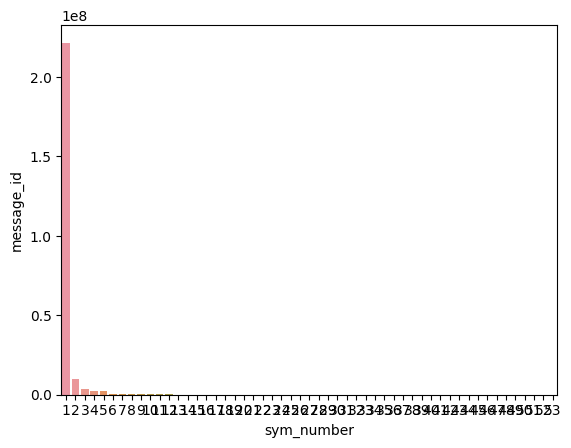

In [24]:
sns.barplot(data =sym_count,x = 'sym_number',y = 'message_id')

In [25]:
sym_count

,sym_number,message_id
0,1,221760247
1,2,9959967
2,3,3646425
3,4,2208945
4,5,2014453
5,6,495009
6,7,291240
7,8,190359
8,10,142117
9,9,135844


In [27]:
df['symbol'] = [i[0] for i in df['symbol_list']]
df.to_csv('E:\\analysis_data\\have_symbol_big.csv')

In [28]:
df.head()

,message_id,user_id,created_at,sentiment,symbol_list,sym_number,symbol
0,4,593,2008-05-27,NaN,[V],1,V
1,5,8687,2008-05-27,NaN,[NES],1,NES
2,6,549,2008-05-27,NaN,[AAPL],1,AAPL
3,7,170,2008-05-27,NaN,[XLE],1,XLE
4,9,126,2008-05-27,NaN,[AAPL],1,AAPL


#### popularity check

In [16]:
df['month'] = [i[:7] for i in df['created_at']]

In [17]:
df.head()

,message_id,user_id,created_at,symbol,month
0,4,593,2008-05-27,V,2008-05
1,5,8687,2008-05-27,NES,2008-05
2,6,549,2008-05-27,AAPL,2008-05
3,7,170,2008-05-27,XLE,2008-05
4,9,126,2008-05-27,AAPL,2008-05


In [18]:
by_month = df.groupby(by = ['month','symbol']).nunique().reset_index()

In [19]:
by_month.head()

,month,symbol,message_id,user_id,created_at
0,2008-05,AAPL,5,3,4
1,2008-05,AMAT,1,1,1
2,2008-05,BB,2,2,1
3,2008-05,BGPIQ,1,1,1
4,2008-05,CACB,1,1,1


In [20]:
pop_all = by_month[['symbol','message_id','user_id']].groupby('symbol').sum().reset_index().sort_values(by = 'message_id', ascending  = False)

In [21]:
pop_all['mes_per_user'] = (pop_all['message_id']/pop_all['user_id']).round(1)

In [22]:
pop_all.head(20)

,symbol,message_id,user_id,mes_per_user
21317,SPY,10418642,636471,16.4
980,AMC,7803227,487955,16.0
73,AAPL,4360352,624646,7.0
22975,TSLA,4109172,559129,7.3
3331,BTC.X,3811611,441338,8.6
6233,DOGE.X,2384847,242185,9.8
991,AMD,2188975,255788,8.6
16547,OCGN,2129895,163971,13.0
15838,NIO,1565127,235429,6.6
1097,AMZN,1540400,317663,4.8


In [23]:
t10 = list(pop_all.head(10)['symbol'])

In [24]:
by_month_t10 = by_month.loc[by_month['symbol'].isin(t10)]

In [25]:
by_month_t10.head()

,month,symbol,message_id,user_id,created_at
0,2008-05,AAPL,5,3,4
48,2008-06,AAPL,54,18,19
57,2008-06,AMD,1,1,1
58,2008-06,AMZN,9,7,5
242,2008-06,SPY,8,4,6


In [26]:
by_month_t10['month'] = pd.to_datetime(by_month_t10['month'])

C:\Users\xl2860\AppData\Local\Temp\24\ipykernel_10480\3502913329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_month_t10['month'] = pd.to_datetime(by_month_t10['month'])


In [27]:
by_month_t10.head()

,month,symbol,message_id,user_id,created_at
0,2008-05-01,AAPL,5,3,4
48,2008-06-01,AAPL,54,18,19
57,2008-06-01,AMD,1,1,1
58,2008-06-01,AMZN,9,7,5
242,2008-06-01,SPY,8,4,6


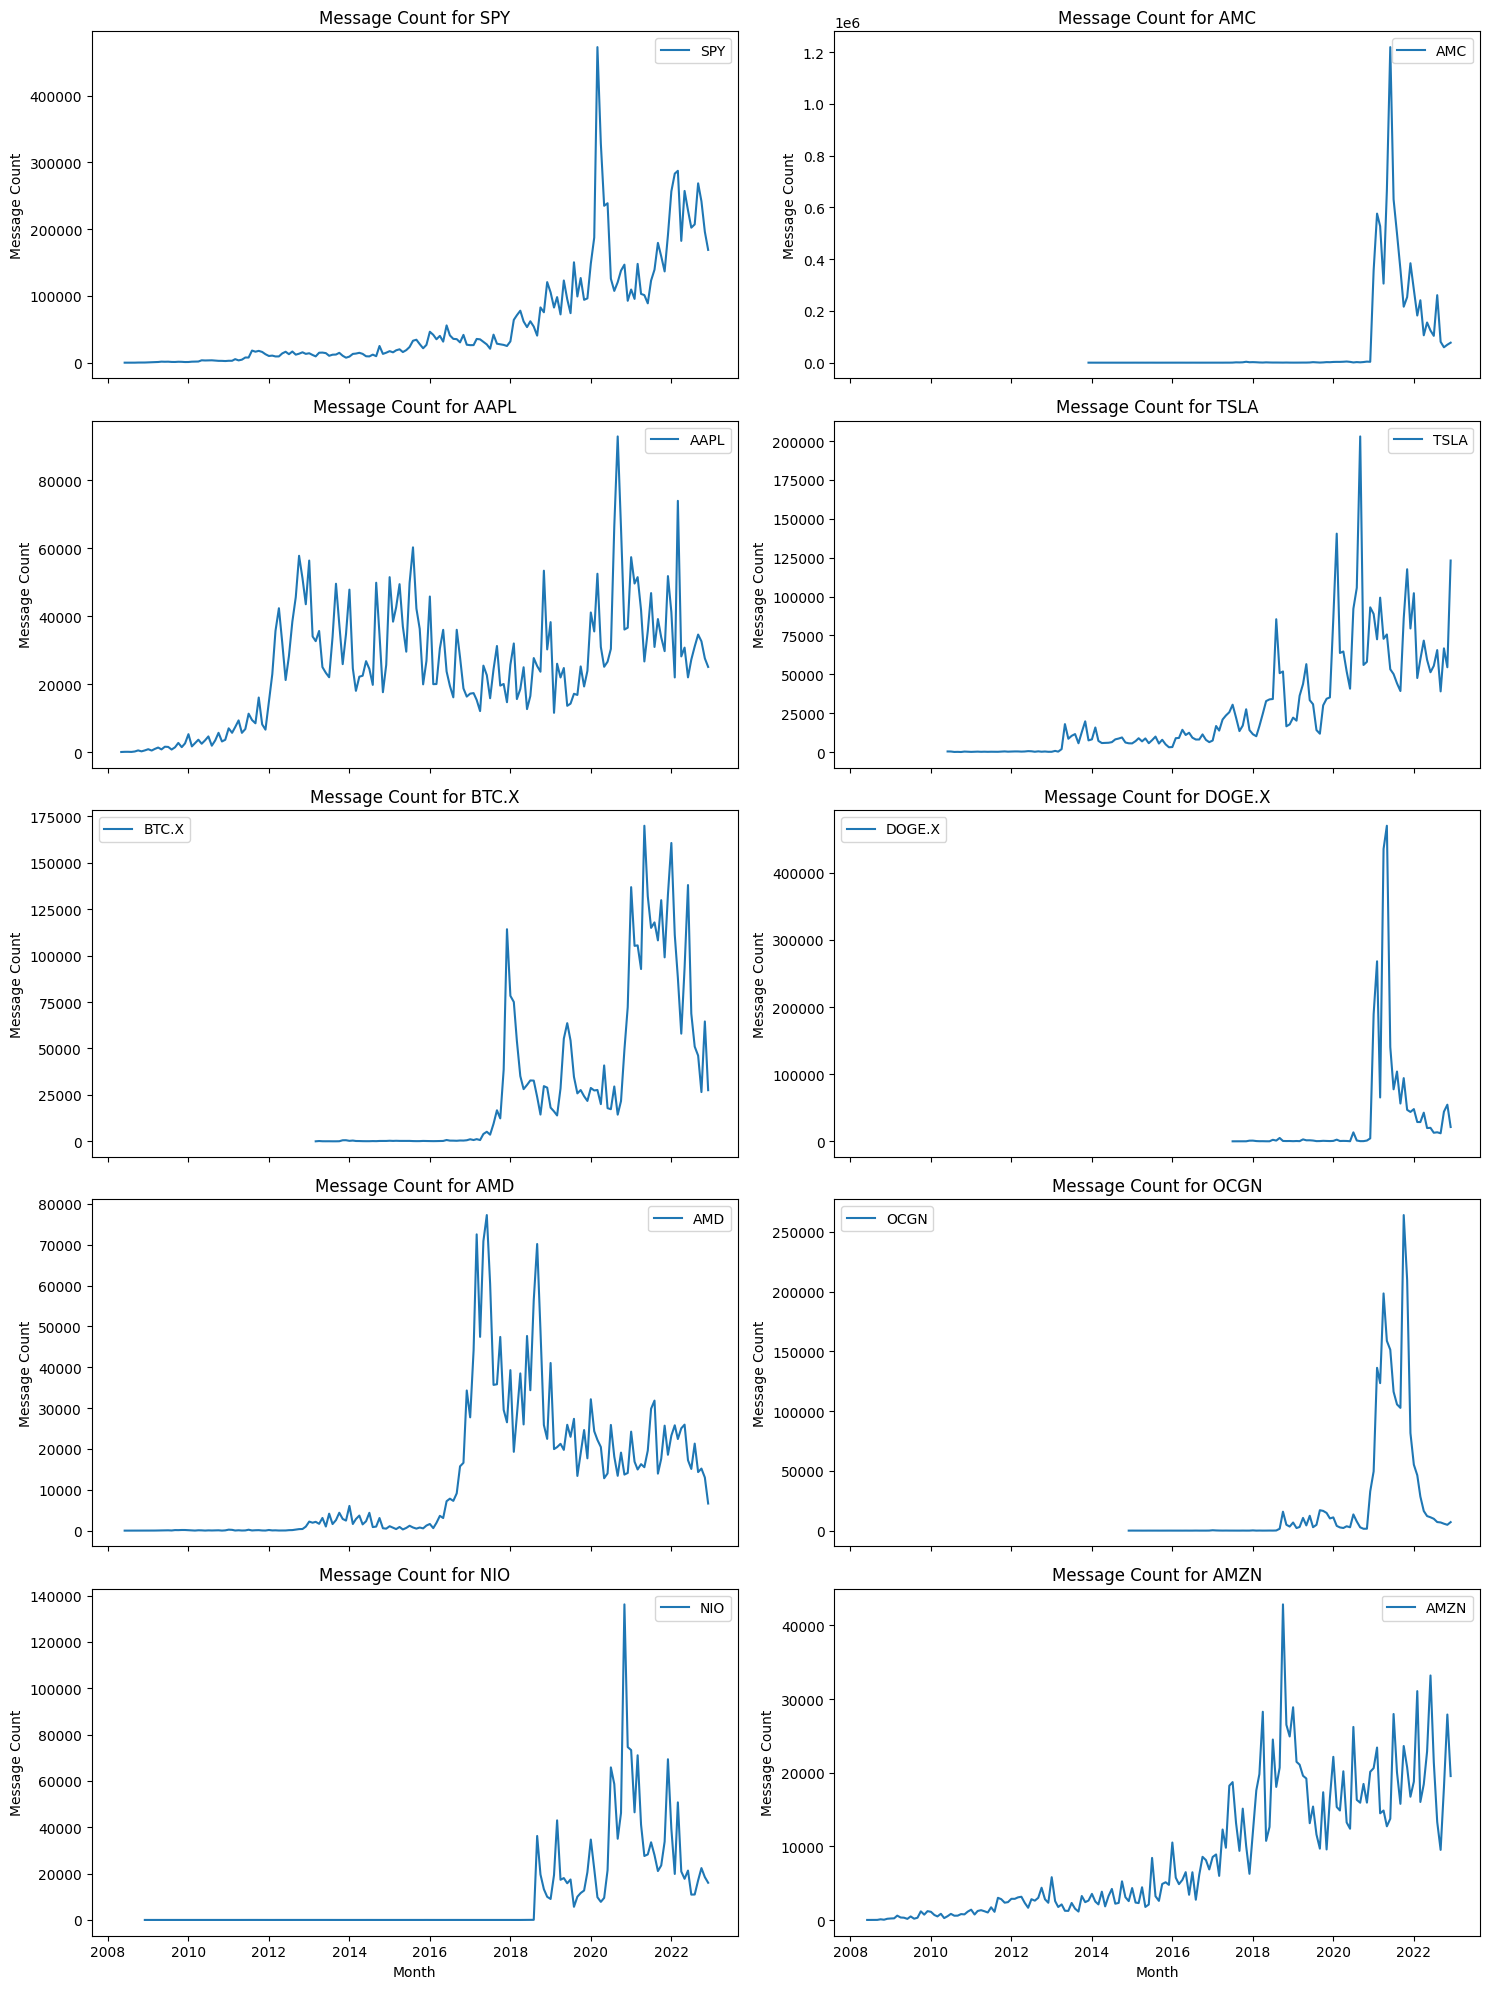

In [28]:
# Get unique symbols
symbols = t10

# Create subplots
fig, axs = plt.subplots(5, 2, figsize=(15, 20), sharex=True)  # 5 rows, 2 columns for 10 subplots
axs = axs.flatten()  # Flatten the 2D array of axes

# Plot each symbol
for i, symbol in enumerate(symbols):
    ax = axs[i]
    symbol_df = by_month_t10[by_month_t10['symbol'] == symbol].sort_values(by='month')
    sns.lineplot(data=symbol_df, x='month', y='message_id', ax=ax, label=symbol)
    ax.set_title(f'Message Count for {symbol}')
    ax.set_ylabel('Message Count')
    ax.set_xlabel('Month')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [30]:
pop_all.head(20)

,symbol,message_id,user_id,mes_per_user
21317,SPY,10418642,636471,16.4
980,AMC,7803227,487955,16.0
73,AAPL,4360352,624646,7.0
22975,TSLA,4109172,559129,7.3
3331,BTC.X,3811611,441338,8.6
6233,DOGE.X,2384847,242185,9.8
991,AMD,2188975,255788,8.6
16547,OCGN,2129895,163971,13.0
15838,NIO,1565127,235429,6.6
1097,AMZN,1540400,317663,4.8


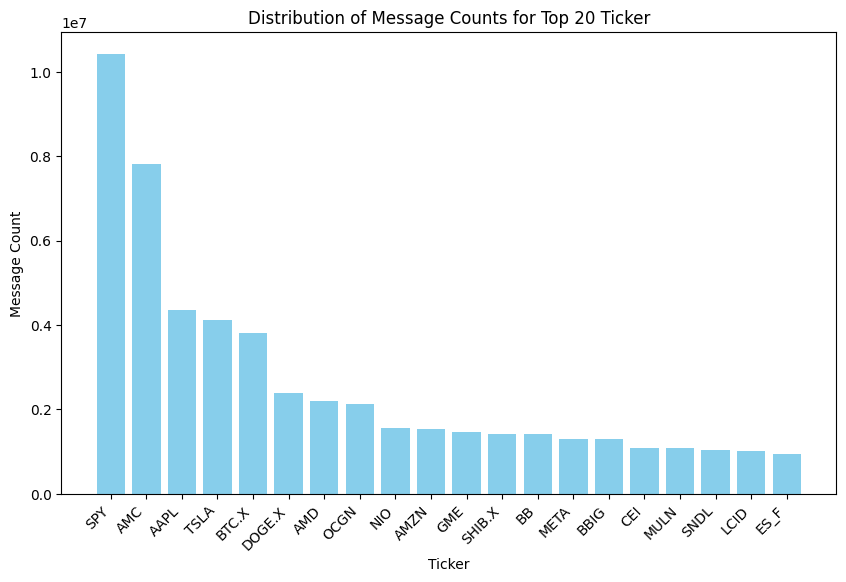

In [75]:

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(pop_all.head(20)['symbol'], pop_all.head(20)['message_id'], color='skyblue')
plt.xlabel('Ticker')
plt.ylabel('Message Count')
plt.title('Distribution of Message Counts for Top 20 Ticker')
# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')
plt.show()

<Axes: xlabel='mes_per_user', ylabel='Count'>

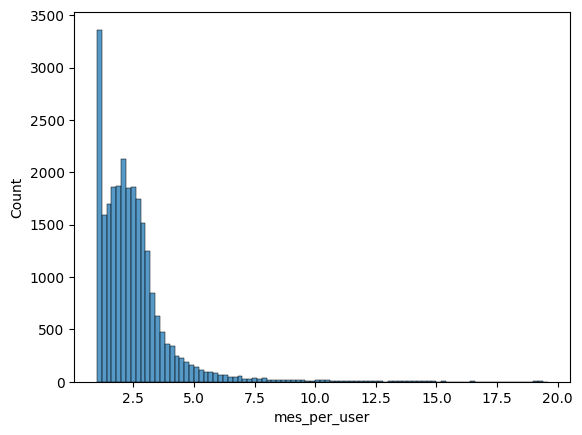

In [84]:
d = pop_all.loc[pop_all['mes_per_user']<=20]['mes_per_user']
sns.histplot(data = d, binwidth=0.2)

In [63]:
by_month['month'] = pd.to_datetime(by_month['month'] ,  format='%Y-%m')

In [31]:
# Function to get top 20 symbols for each month
def get_top_symbols(df):
    top_symbols = df.nlargest(20, 'message_id')
    return top_symbols

# Group by 'month' and apply the function
top_20_per_month = by_month.groupby('month').apply(get_top_symbols).reset_index(drop=True)

# Count how many times each symbol appears in the top 20 across all months
top_20_count = top_20_per_month['symbol'].value_counts().reset_index()
top_20_count.columns = ['symbol', 'count']

In [32]:
top_20_count.head(20)

,symbol,count
0,SPY,174
1,AAPL,169
2,TSLA,105
3,AMZN,98
4,BB,92
5,ES_F,90
6,SPX,79
7,NFLX,67
8,META,62
9,AMD,61


In [42]:
by_mes_count = pop_all.reset_index().reset_index().rename(columns={'level_0':'rank_by_mes_count'}).head(100)[['rank_by_mes_count','symbol']]

In [43]:
by_mes_count.head()

,rank_by_mes_count,symbol
0,0,SPY
1,1,AMC
2,2,AAPL
3,3,TSLA
4,4,BTC.X


In [44]:
by_month_count = top_20_count.head(100).reset_index().rename(columns = {'index':'rank_by_month'})[['rank_by_month','symbol']]

In [45]:
by_month_count.head()

,rank_by_month,symbol
0,0,SPY
1,1,AAPL
2,2,TSLA
3,3,AMZN
4,4,BB


In [46]:
pop_symbols = by_mes_count.merge(by_month_count,on= 'symbol')

In [49]:
pop_symbols['rank_diff'] = pop_symbols['rank_by_mes_count']-pop_symbols['rank_by_month']

In [50]:
pop_symbols.head(20)

,rank_by_mes_count,symbol,rank_by_month,rank_diff
0,0,SPY,0,0
1,1,AMC,23,-22
2,2,AAPL,1,1
3,3,TSLA,2,1
4,4,BTC.X,10,-6
5,5,DOGE.X,31,-26
6,6,AMD,9,-3
7,7,OCGN,29,-22
8,8,NIO,16,-8
9,9,AMZN,3,6


In [51]:
pop_symbols.to_csv('E:\\analysis_data\\symbol_ranks.csv')

In [66]:
len(by_month['month'].unique())

176

In [69]:
t20 = list(pop_all['symbol'][:20])
len(t20)

20

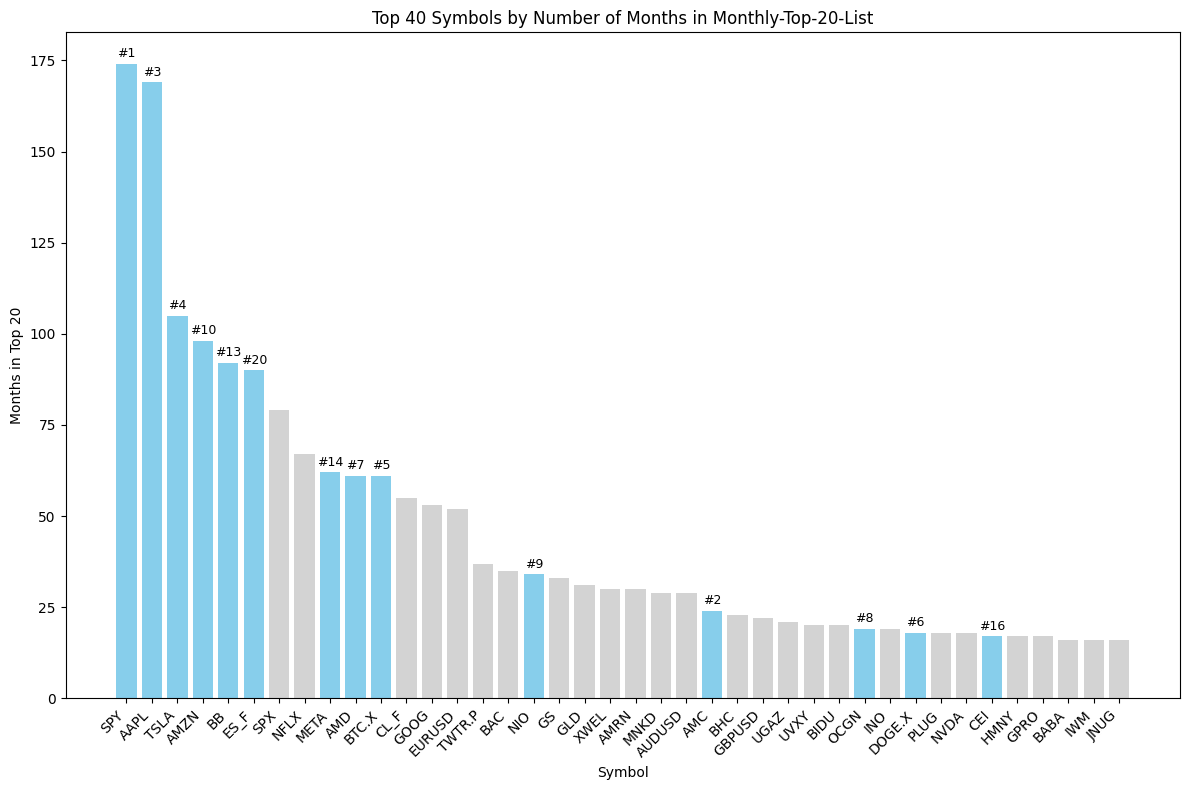

In [92]:
# Function to get top 20 symbols for each month
def get_top_symbols(df):
    top_symbols = df.nlargest(20, 'message_id')
    return top_symbols

# Group by 'month' and apply the function
top_20_per_month = by_month.groupby('month').apply(get_top_symbols).reset_index(drop=True)

# Count how many times each symbol appears in the top 20 across all months
top_20_count = top_20_per_month['symbol'].value_counts().reset_index()
top_20_count.columns = ['symbol', 'count']

# Define the total top 20 symbols list
t20_symbols = t20

# Add 'in_t20' column to indicate if the symbol is in the total top 20 list
top_20_count['in_t20'] = top_20_count['symbol'].isin(t20_symbols)

# Determine the rank of each symbol in the top 20 list
top_20_count['rank'] = top_20_count['symbol'].apply(lambda x: t20_symbols.index(x) + 1 if x in t20_symbols else None)

# Get the top 40 symbols with the most months
top_40_symbols = top_20_count.nlargest(40, 'count')

# Plotting the bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(top_40_symbols['symbol'], top_40_symbols['count'], color=top_40_symbols['in_t20'].map({True: 'skyblue', False: 'lightgray'}))
plt.xlabel('Symbol')
plt.ylabel('Months in Top 20')
plt.title('Top 40 Symbols by Number of Months in Monthly-Top-20-List')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Annotate bars with rank
for bar, rank in zip(bars, top_40_symbols['rank']):
    if pd.notna(rank):  # Check if rank is not NaN
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'#{int(rank)}', ha='center', va='bottom', fontsize=9, color='black')

# Show the plot
plt.tight_layout()
plt.show()

In [73]:
t20

['SPY',
 'AMC',
 'AAPL',
 'TSLA',
 'BTC.X',
 'DOGE.X',
 'AMD',
 'OCGN',
 'NIO',
 'AMZN',
 'GME',
 'SHIB.X',
 'BB',
 'META',
 'BBIG',
 'CEI',
 'MULN',
 'SNDL',
 'LCID',
 'ES_F']

## Popularity dinamics

In [2]:
cnt = pd.read_csv("E:\\analysis_data\\count_by_date.csv").drop(columns = 'Unnamed: 0')

In [3]:
cnt.head()

,date,message_id_count,parent_message_id_count,in_reply_to_message_id_count,unique_user_id_count
0,2008-05-27,5,0,0,5
1,2008-05-28,11,0,0,11
2,2008-05-29,26,0,0,13
3,2008-05-30,29,0,0,17
4,2008-05-31,3,0,0,3


In [64]:
sum(cnt.loc[cnt['date']<='2022-12-31']['unique_user_id_count'])

71171725

In [4]:
cnt['month'] = [i[:7]+'-15' for i in cnt['date']]

In [5]:
bydate = cnt[['month','message_id_count']].groupby(by = 'month').sum().reset_index().rename(columns = {'month':'date','message_id_count':'message_id'})

In [6]:
bydate = bydate.loc[bydate['date']<='2022-12-31']
bydate['date'] = pd.to_datetime(bydate['date'])

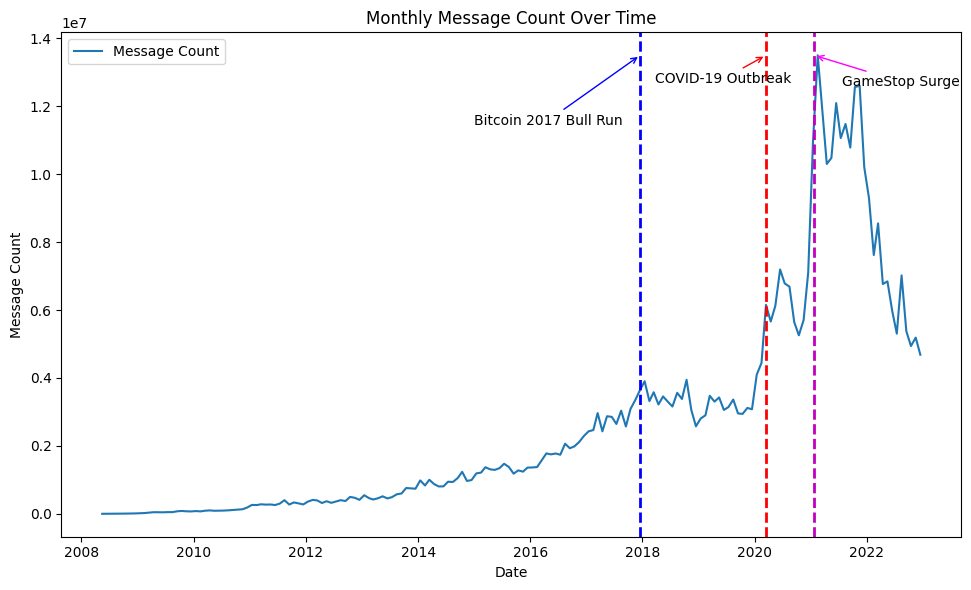

In [11]:
# Data for the first plot
df1 = bydate.sort_values(by='date')
covid_break_date1 = pd.to_datetime('2020-03-15')
bull_run_date1 = pd.to_datetime('2017-12-17')
gamestop_surge_start_date1 = pd.to_datetime('2021-01-22')

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot
sns.lineplot(data=df1, x='date', y='message_id', ax=ax, label='Message Count')
ax.set_title('Monthly Message Count Over Time')
ax.set_ylabel('Message Count')
ax.set_xlabel('Date')

# Annotations
ax.axvline(x=covid_break_date1, color='r', linestyle='--', linewidth=2)
ax.annotate('COVID-19 Outbreak', xy=(covid_break_date1, df1['message_id'].max()),
            xytext=(-80, -20), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='red'))

ax.axvline(x=bull_run_date1, color='b', linestyle='--', linewidth=2)
ax.annotate('Bitcoin 2017 Bull Run', xy=(bull_run_date1, df1['message_id'].max()),
            xytext=(-120, -50), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='blue'))

ax.axvline(x=gamestop_surge_start_date1, color='m', linestyle='--', linewidth=2)
ax.annotate('GameStop Surge', xy=(gamestop_surge_start_date1, df1['message_id'].max()),
            xytext=(20, -22), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='magenta'))

# Final layout adjustments
plt.tight_layout()
plt.show()







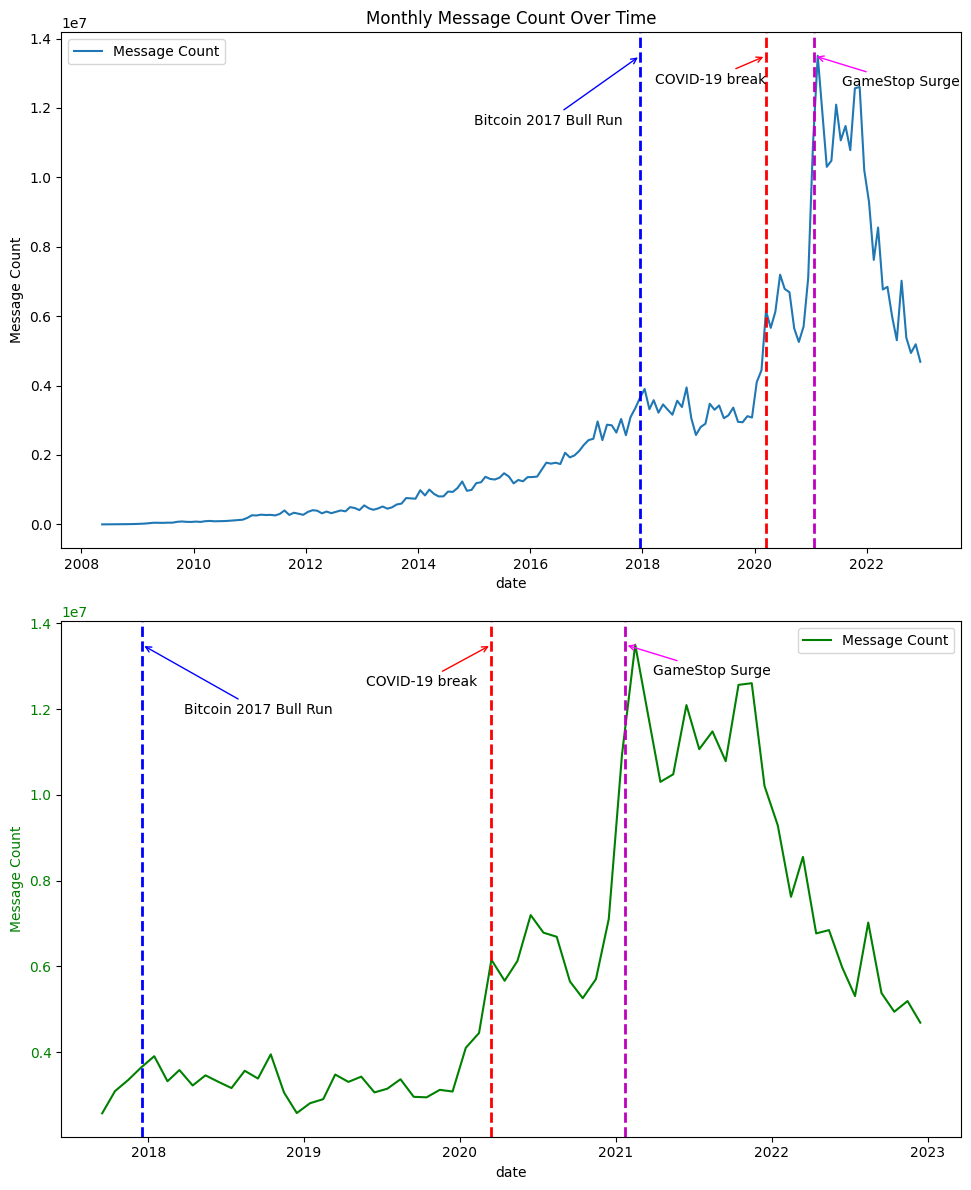

In [12]:
# Data for the first plot
df1 = bydate.sort_values(by='date')
covid_break_date1 = pd.to_datetime('2020-03-15')
bull_run_date1 = pd.to_datetime('2017-12-17')
gamestop_surge_start_date1 = pd.to_datetime('2021-01-22')

# Data for the second plot
df2 = bydate.sort_values(by='date')
df2 = df2.loc[df2['date']>=pd.to_datetime('2017-09-01')]
covid_break_date2 = pd.to_datetime('2020-03-15')
bull_run_date2 = pd.to_datetime('2017-12-17')
gamestop_surge_start_date2 = pd.to_datetime('2021-01-22')

# Create subplots
fig, axs = plt.subplots(2, figsize=(10, 12), sharex=False)

# Plot 1
sns.lineplot(data=df1, x='date', y='message_id', ax=axs[0], label='Message Count')
axs[0].set_title('Monthly Message Count Over Time')
axs[0].set_ylabel('Message Count')
axs[0].axvline(x=covid_break_date1, color='r', linestyle='--', linewidth=2)
axs[0].annotate('COVID-19 break', xy=(covid_break_date1, df1['message_id'].max()),
                xytext=(-80, -20), textcoords='offset points',
                arrowprops=dict(arrowstyle='->', color='red'))
axs[0].axvline(x=bull_run_date1, color='b', linestyle='--', linewidth=2)
axs[0].annotate('Bitcoin 2017 Bull Run', xy=(bull_run_date1, df1['message_id'].max()),
                xytext=(-120, -50), textcoords='offset points',
                arrowprops=dict(arrowstyle='->', color='blue'))
axs[0].axvline(x=gamestop_surge_start_date1, color='m', linestyle='--', linewidth=2)
axs[0].annotate('GameStop Surge', xy=(gamestop_surge_start_date1, df1['message_id'].max()),
                xytext=(20, -22), textcoords='offset points',
                arrowprops=dict(arrowstyle='->', color='magenta'))

# Plot 2 with secondary y-axis
sns.lineplot(data=df2, x='date', y='message_id', ax=axs[1], label='Message Count', color='green')
axs[1].set_xlabel('date')
axs[1].set_ylabel('Message Count', color='green')
axs[1].tick_params(axis='y', labelcolor='green')
# ax2 = axs[1].twinx()
#ax2.set_ylabel('Message Count', color='blue')
#ax2.tick_params(axis='y', labelcolor='blue')
axs[1].axvline(x=covid_break_date2, color='r', linestyle='--', linewidth=2)
axs[1].annotate('COVID-19 break', xy=(covid_break_date2, df2['message_id'].max()),
             xytext=(-90, -30), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='red'))
axs[1].axvline(x=bull_run_date2, color='b', linestyle='--', linewidth=2)
axs[1].annotate('Bitcoin 2017 Bull Run', xy=(bull_run_date2, df2['message_id'].max()),
             xytext=(30, -50), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='blue'))
axs[1].axvline(x=gamestop_surge_start_date2, color='m', linestyle='--', linewidth=2)
axs[1].annotate('GameStop Surge', xy=(gamestop_surge_start_date2, df2['message_id'].max()),
             xytext=(20, -22), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='magenta'))

#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [50]:
bydate = cnt[['date','message_id_count']].groupby(by = 'date').sum().reset_index()

In [51]:
bydate = bydate.loc[bydate['date']<='2022-12-31']

In [52]:
bydate['date'] = pd.to_datetime(bydate['date'])

In [53]:
bydate.rename(columns = {'message_id_count':'message_id'}, inplace=True)
bydate.head()

,date,message_id
0,2008-05-27,5
1,2008-05-28,11
2,2008-05-29,26
3,2008-05-30,29
4,2008-05-31,3


In [56]:
bydate.tail()

,date,message_id
5326,2022-12-27,160763
5327,2022-12-28,173035
5328,2022-12-29,171645
5329,2022-12-30,159126
5330,2022-12-31,51795


In [55]:
np.mean(bydate.loc[bydate['date']<=pd.to_datetime('2017-12-17')]['message_id'])

28201.0435405328

In [57]:
np.mean(bydate.loc[(bydate['date']>=pd.to_datetime('2017-12-17'))& (bydate['date']<=pd.to_datetime('2020-03-15'))]['message_id'])

111118.13414634146

In [60]:
np.mean(bydate.loc[(bydate['date']<=pd.to_datetime('2021-01-22'))& (bydate['date']>=pd.to_datetime('2020-03-15'))]['message_id'])

211240.07324840763

In [61]:
np.mean(bydate.loc[bydate['date']>=pd.to_datetime('2021-01-22')]['message_id'])

295054.7672778561

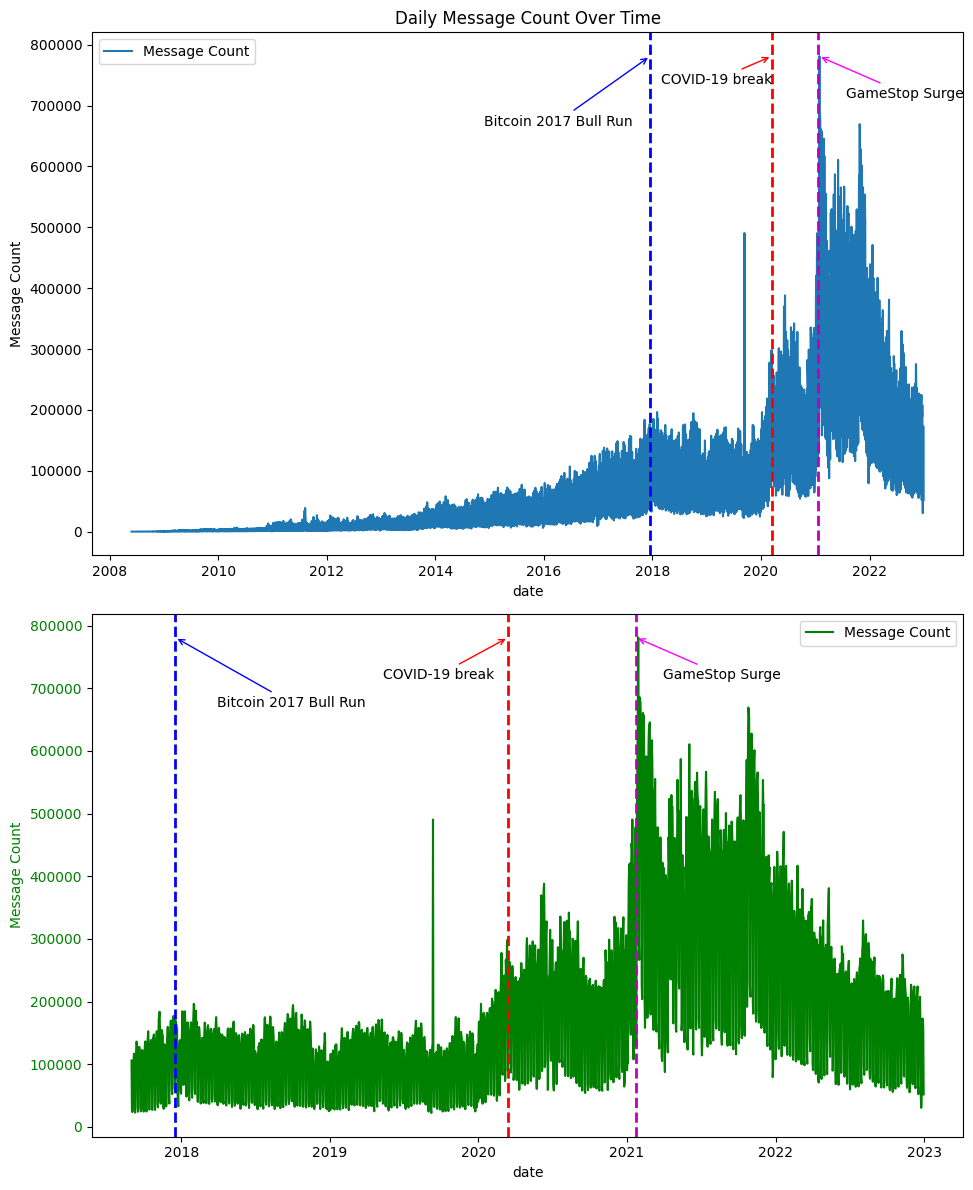

In [45]:
# Data for the first plot
df1 = bydate.sort_values(by='date')
covid_break_date1 = pd.to_datetime('2020-03-15')
bull_run_date1 = pd.to_datetime('2017-12-17')
gamestop_surge_start_date1 = pd.to_datetime('2021-01-22')

# Data for the second plot
df2 = bydate.sort_values(by='date')
df2 = df2.loc[df2['date']>=pd.to_datetime('2017-09-01')]
covid_break_date2 = pd.to_datetime('2020-03-15')
bull_run_date2 = pd.to_datetime('2017-12-17')
gamestop_surge_start_date2 = pd.to_datetime('2021-01-22')

# Create subplots
fig, axs = plt.subplots(2, figsize=(10, 12), sharex=False)

# Plot 1
sns.lineplot(data=df1, x='date', y='message_id', ax=axs[0], label='Message Count')
axs[0].set_title('Daily Message Count Over Time')
axs[0].set_ylabel('Message Count')
axs[0].axvline(x=covid_break_date1, color='r', linestyle='--', linewidth=2)
axs[0].annotate('COVID-19 break', xy=(covid_break_date1, df1['message_id'].max()),
                xytext=(-80, -20), textcoords='offset points',
                arrowprops=dict(arrowstyle='->', color='red'))
axs[0].axvline(x=bull_run_date1, color='b', linestyle='--', linewidth=2)
axs[0].annotate('Bitcoin 2017 Bull Run', xy=(bull_run_date1, df1['message_id'].max()),
                xytext=(-120, -50), textcoords='offset points',
                arrowprops=dict(arrowstyle='->', color='blue'))
axs[0].axvline(x=gamestop_surge_start_date1, color='m', linestyle='--', linewidth=2)
axs[0].annotate('GameStop Surge', xy=(gamestop_surge_start_date1, df1['message_id'].max()),
                xytext=(20, -30), textcoords='offset points',
                arrowprops=dict(arrowstyle='->', color='magenta'))

# Plot 2 with secondary y-axis
sns.lineplot(data=df2, x='date', y='message_id', ax=axs[1], label='Message Count', color='green')
axs[1].set_xlabel('date')
axs[1].set_ylabel('Message Count', color='green')
axs[1].tick_params(axis='y', labelcolor='green')
# ax2 = axs[1].twinx()
#ax2.set_ylabel('Message Count', color='blue')
#ax2.tick_params(axis='y', labelcolor='blue')
axs[1].axvline(x=covid_break_date2, color='r', linestyle='--', linewidth=2)
axs[1].annotate('COVID-19 break', xy=(covid_break_date2, df2['message_id'].max()),
             xytext=(-90, -30), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='red'))
axs[1].axvline(x=bull_run_date2, color='b', linestyle='--', linewidth=2)
axs[1].annotate('Bitcoin 2017 Bull Run', xy=(bull_run_date2, df2['message_id'].max()),
             xytext=(30, -50), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='blue'))
axs[1].axvline(x=gamestop_surge_start_date2, color='m', linestyle='--', linewidth=2)
axs[1].annotate('GameStop Surge', xy=(gamestop_surge_start_date2, df2['message_id'].max()),
             xytext=(20, -30), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='magenta'))

#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()